# 국가별 음주 데이터 분석
- 탐색적 데이터 분석 이해하기
- 한국은 얼마나 강한 술을 마시는 나라인가?

## 데이터 기초 살펴보기
### 데이터 셋 정보
- country: 국가
- beer_servings: 맥주 소비량
- spirit_servings: 증류주 소비량
- wine_servings: 와인 소비량
- total_litres_of_pure_alcohol: 총 알콜 소비량
- coutinent: 국가의 대륙 정보


In [7]:
# drinks 데이터셋의 기초 정보 출력
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './data/drinks.csv'
drinks = 
drinks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 결과
- 총 193개의 데이터가 있음
- country와 continent를 제외하고 모두 수치형
- continent 피처는 23개의 결측값 존재

In [8]:
# 앞부분 데이터 일부만 확인


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
# 기술 통계 확인


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 인사이트 발견(탐색과 시각화)
- 상관관계 확인하기
  - 단순 상관 분석(피처가 2개 일 때)
  - 다중 상관 분석(대상 피처가 여러 개일 때)

#### 상관분석
- 두 변수 간의 선형적 관계를 상관계수로 표현하는 것
- 상관계수를 구하는 것은 공분산의 개념을 포함
- 공분산은 2개의 확률 변수에 대한 상관 정도를 표현
- 2개의 변수 중 하나의 값이 상승할 때 다른 값도 상승하는 지를 수치로 나타낸 것
- 공분산 만으로 상관관계를 구하면 두 변수 단위 크기에 따라 값이 영향을 받을 수 있으므로 -1 ~ 1 사이의 값으로 변환(이것이 상관 계수)
- 상관계수가 1에 가까우면 강한 양의 상관관계
- 상관계수가 -1에 가까우면 강한 음의 상관관계

- beer_serving, wine_servings, spirit_servings, total_liters_of+pure_alcohol 피처에 대해서 확인
- 종류만 다르지 모두 술에 해당됨

In [10]:
# 맥수와 와인 소비량의 상관 관계 확인해보기
# pearson 상관계수 이용
corr = 
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


- 두 피처간의 상관계수는 0.52

In [11]:
# 상관계수 피처 간 행렬 구하기
cols = [
    'beer_servings',
    'spirit_servings',
    'wine_servings',
    'total_litres_of_pure_alcohol'
]
corr = 
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


### Seaborn 활용 시각화

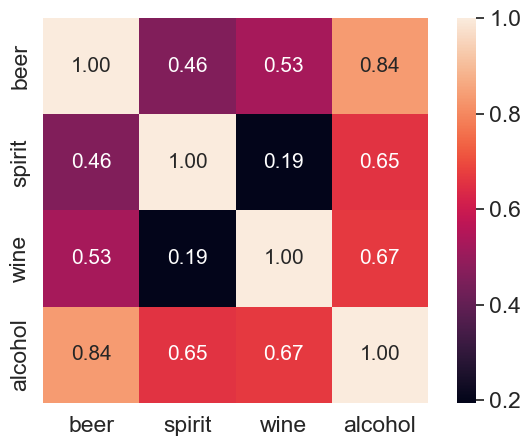

In [12]:
# seaborn 활용 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵을 시각화
cols_view = [
    'beer',
    'spirit',
    'wine',
    'alcohol'
]
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 15},
                 yticklabels = cols_view,
                 xticklabels = cols_view
                 )

plt.tight_layout()
plt.show()

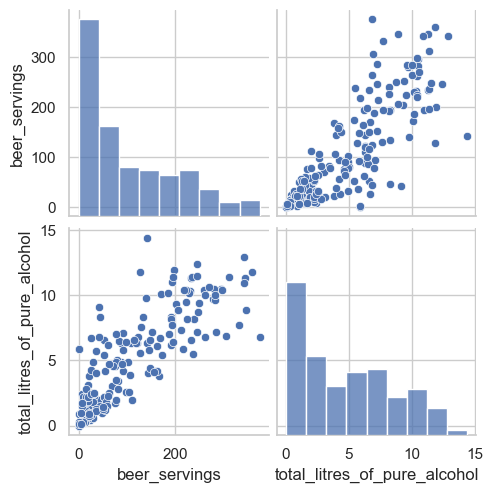

In [13]:
# 맥주와 알콜 피처 간 산점도
sns.set(style='whitegrid', context='notebook')
sns.pairplot(
    drinks[['beer_servings', 'total_litres_of_pure_alcohol']],
    height = 2.5)
plt.show()

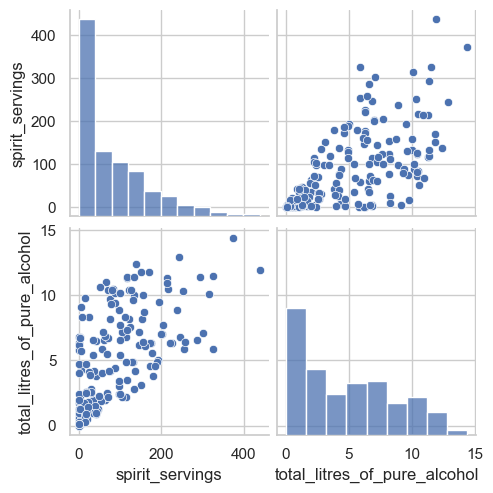

In [14]:
# 증류주와 알콜 피처 간 산점도
sns.set(style='whitegrid', context='notebook')
sns.pairplot(
    drinks[['spirit_servings', 'total_litres_of_pure_alcohol']],
    height = 2.5)
plt.show()

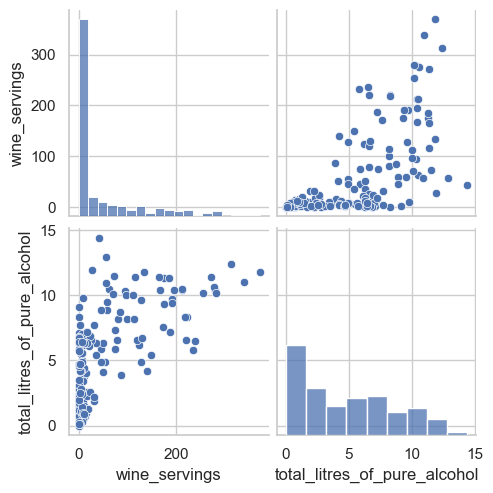

In [15]:
# 와인과 알콜 피처 간 산점도
sns.set(style='whitegrid', context='notebook')
sns.pairplot(
    drinks[['wine_servings', 'total_litres_of_pure_alcohol']],
    height = 2.5)
plt.show()

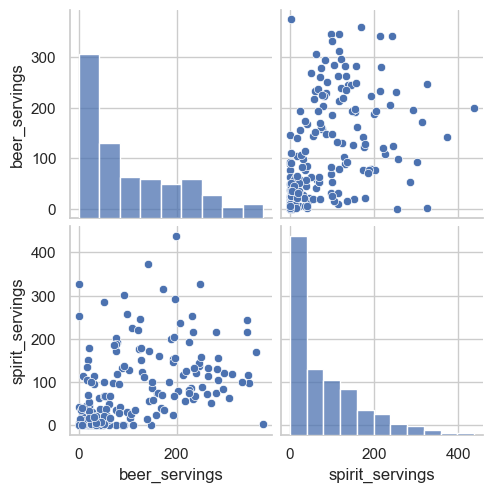

In [16]:
# 맥주와 증류주 피처 간 산점도
sns.set(style='whitegrid', context='notebook')
sns.pairplot(
    drinks[['beer_servings', 'spirit_servings']],
    height = 2.5)
plt.show()

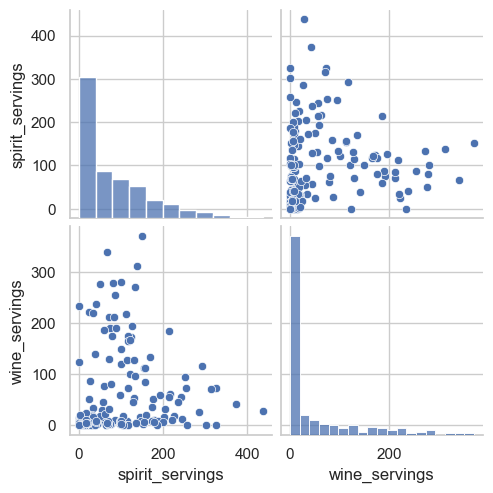

In [17]:
# 증류주와 와인 피처 간 산점도
sns.set(style='whitegrid', context='notebook')
sns.pairplot(
    drinks[['spirit_servings', 'wine_servings']],
    height = 2.5)
plt.show()

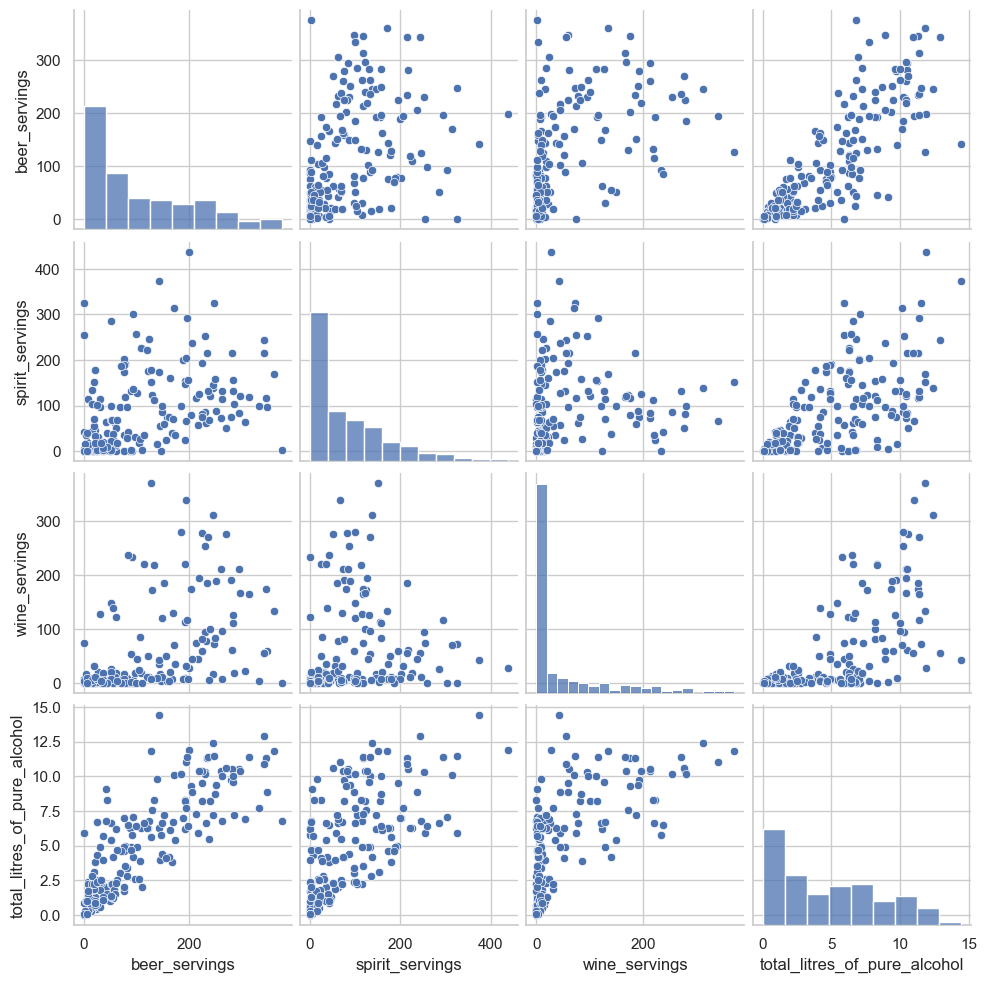

In [18]:
# 피처 간 산점도
sns.set(style='whitegrid', context='notebook')
sns.pairplot(
    drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']],
    height = 2.5)
plt.show()

## 탐색적 분석(스무고개)
- 탐색적 분석 전에 continent 피처에 있는 결측치 처리
- 대륙에 대한 정보가 없는 국가: Others를 줄여 OT로 정의
- fillna() 활용

In [19]:
drinks['continent']

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [20]:
# null값 확인


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [21]:
# null값 개수 확인


23

In [22]:
# null값 대체 및 확인


0

### 시각화
- 파이차트 활용해보기
- explode: 조각 분리하여 표시하는 정도

In [23]:
# 각 값의 개수 확인


AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [24]:
# 인덱스 확인


Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

In [25]:
# 인덱스를 리스트로 변환하고 labels에 담음

labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [26]:
# 값 개수 확인


array([53, 45, 44, 23, 16, 12], dtype=int64)

In [27]:
# 값 개수 리스트로 변환


[53, 45, 44, 23, 16, 12]

In [28]:
# 값 개수 리스트로 변환
fracs1 = 

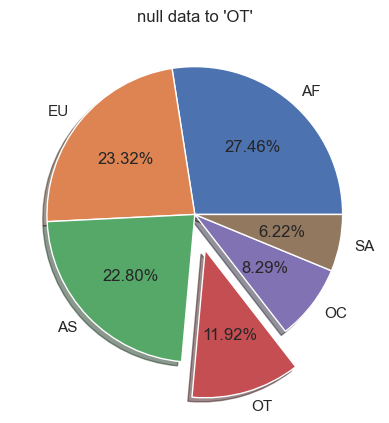

In [68]:
# OT 조각을 0.25만큼 떨어뜨림
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.2f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

- fracs1의 총합에서 각 frac1의 요소가 몇 퍼센트인지 파이차트에 표시함.
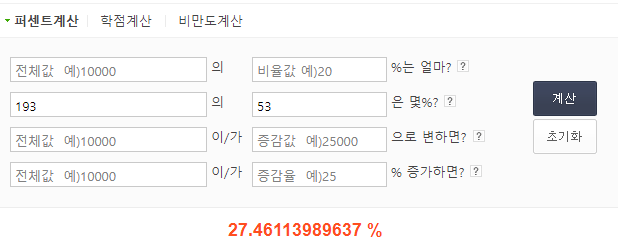
- OT는 국가별 대륙이 표시되지 않은 부분을 표현

### 대륙별 spirit_servings의 통계적 정보 확인
- agg() 함수
    - apply()에 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러 연산 결과를 동시에 얻을 수 있는 함수

In [30]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산
result = 
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 전체 평균보다 많은 알코올을 섭취하는 대륙은?

In [32]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙
continent_over_mean = 
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### 평균 beer_servings이 가장 높은 대륙?
- idxmax()함수
    - Series객체에서 가장 큰 값의 index를 반환

In [34]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
beer_continent = 
beer_continent

'EU'

### 시각화
- 분석 결과를 시각화할 수 있다.

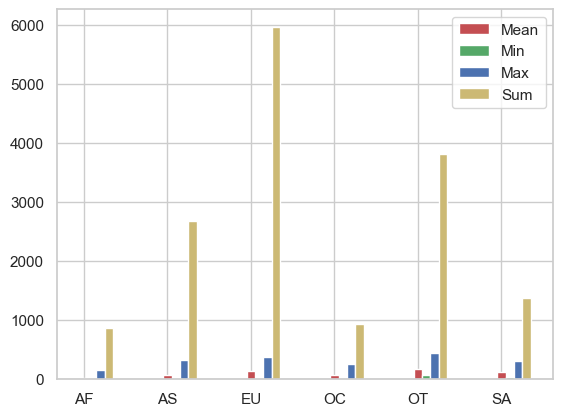

In [35]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

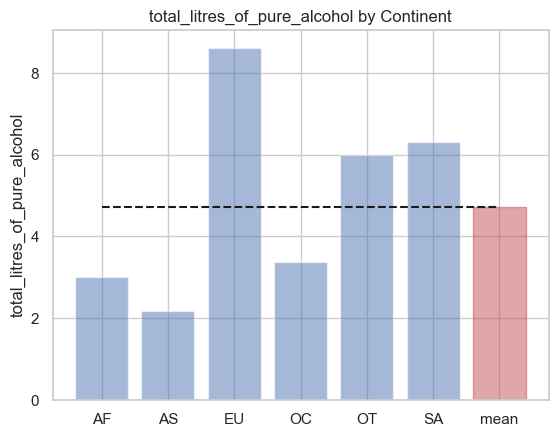

In [36]:
# 대륙별 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

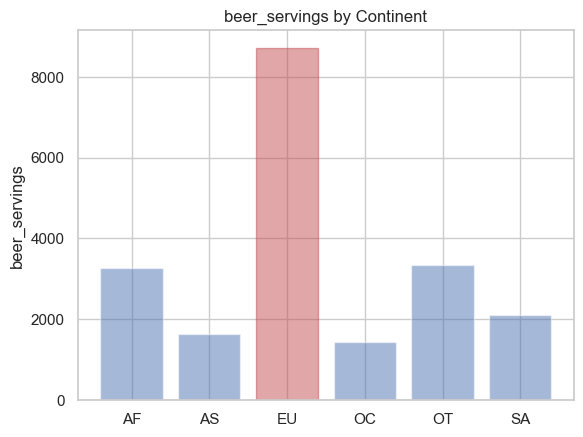

In [37]:
# 대륙별 beer_servings을 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

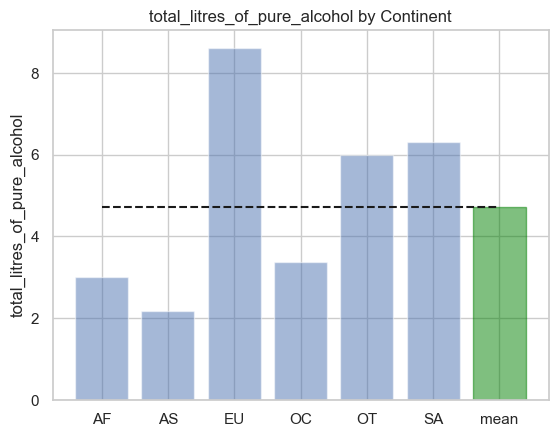

In [38]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

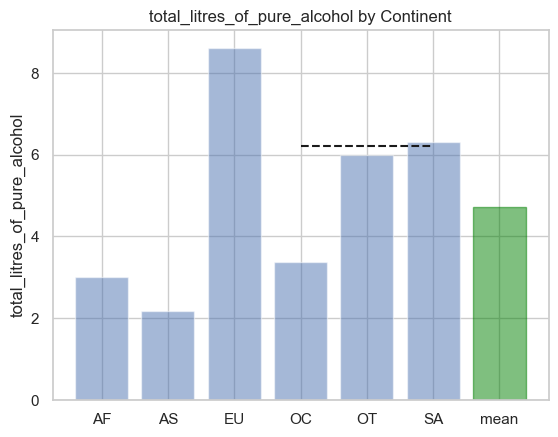

In [39]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

## 통계적 분석: 분석 대상 간의 통계적 차이 검정
- 두 피처간의 상관성, 그룹 단위 수치정보를 통해 데이터를 분석할 수 있음
- 위와 같은 분석은 분석가의 주관이 많이 반영됨
- 분석 자체의 타당성을 증명하기 위해 검정과정이 필요
- 가장 기본적인 통계적 검정 방식인 t-test를 통해 분석 대상 간에 통계적 차이를 검정

- t-test:
    - 두 집단 간 평균의 차이에 대한 검정 방법
    - 모집단의 평균 등과 같이 실제 정보를 모르는 상황에서 현재 데이터만을 가지고 두 집단 간 차이를 검정할 수 있는 방법
    - 검정 대상이 되는 두 집단의 데이터 개수가 비슷하면서 두 데이터가 정규분포를 보이는 경우 신뢰도가 높은 방식
      
- scipy라이브러리 활용
    - ttest_ind(): 두 함수 집단의 시리즈 데이터 전달하면 검정 결과 반환
        equal_var: t-test방법 지정(두 집단 파라미터의 분산이 같은 경우/다른 경우)

In [41]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [43]:
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


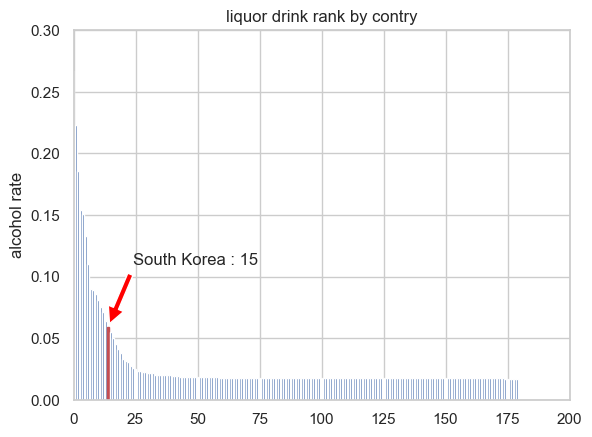

In [44]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

# 정리
- 대부분 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받을 확률이 높음
    대부분의 국가에서는 맥주가 가장 많이 소비되는 술이하고 해석할 수도 있음
- 유럽이 가장 맥주 소비량이 높음. (대륙별로 다소 차이가 있음을 발견)
- "술 소비량 대비 알코올 비율" 이라는 새 피처로부터 술을 톡하게 마시는 정도의 국가별 차이를 관찰 할 수 있음
- t_test 결과: 아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미한 차이를 보임
    (단, 예제는 그룹 간 데이터 크기가 작고, 다르고, 정규분포를 띤다는 가정을 할 수 없으므로 신뢰할 만한 정보는 아니라고 볼 수 있음

## 연습 문제
- 다음과 같이 데이터를 불러온 후 진행

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러
drinks['continent'] = drinks['continent'].fillna('OT')

In [56]:
# 1. 대륙별 평균 wine_servings 탐색
result = 
df = 
df = 
drinks = 

drinks[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head()

,country,continent,wine_servings_cont_avg
172,Paraguay,SA,62.416667
1,Bahrain,AS,9.068182
53,Croatia,EU,142.222222
61,Germany,EU,142.222222
45,Andorra,EU,142.222222


##### 대륙별 평균 wine_servings 피처 생성  설명

- groupby 연산 결과를 반환하면, 반환 데이터의 타입은 dataframe 타입이 아님
- to_frame이라는 함수를 사용하여 dataframe 타입으로 변환한 뒤, 다시 이 dataframe의 index를 reset_index라는 함수로 설정하는 과정이 필요
- 이 과정으로 생성된 dataframe을 원래의 dataframe에 합쳐주어야 함. 이를 위해서는 merge 라는 함수를 또 새롭게 적용해야 하지요. 하지만 transform 함수가 있다면, 이 모든 과정을 단 한줄의 코드로 수행가능


In [61]:
# 2. 국가별 모든 servings의 합을 계산한 total_servings 피처 생성

# 국가별 total_servings 피처를 만들어서 병합
drinks['total_servings'] = 
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(6).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
160,St. Kitts & Nevis,194,32,205,431
2,Bangladesh,0,0,0,0
58,Finland,263,97,133,493
62,Greece,133,218,112,463
131,Sierra Leone,25,2,3,30


In [62]:
# 3. 전체 평균보다 적은 알코올을 마시는 대륙 중, spirit을 가장 많이 마시는 국가?
total_mean = 
continent_mean = 
continent_under_mean = 
df_continent_under_mean = 

most_spirit_under_mean = 

# 결과 출력
most_spirit_under_mean['country']

'Russian Federation'

In [63]:
# 4. 술 소비량 대비 알코올 비율을 구하기
# 술 소비량 대비 알콜 비율에 대한 칼럼을 만들어서 병합
drinks['alcohol_rate'] = 
drinks['alcohol_rate'] = 

# 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위를 구함.
drinks['alcohol_rate_rank'] = 
drinks['alcohol_rate_rank'] = 
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

29    15.0
Name: alcohol_rate_rank, dtype: float64

In [65]:
# 5. 대륙별로 술 소비량 대비 알코올 비율을 계산
continent_sum = 
continent_sum['alcohol_rate_continent'] = 
continent_sum = 
continent_sum = 

drinks = 

In [66]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_cont_avg,total_servings,alcohol_rate,alcohol_rate_rank,alcohol_rate_continent_x,alcohol_rate_continent_y
0,Afghanistan,0,0,0,0.0,AS,9.068182,0,0.000000,187.0,0.020293,0.020293
1,Bahrain,42,63,7,2.0,AS,9.068182,112,0.017857,106.0,0.020293,0.020293
2,Bangladesh,0,0,0,0.0,AS,9.068182,0,0.000000,187.0,0.020293,0.020293
3,Bhutan,23,0,0,0.4,AS,9.068182,23,0.017391,174.0,0.020293,0.020293
4,Brunei,31,2,1,0.6,AS,9.068182,34,0.017647,162.0,0.020293,0.020293
